# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

# Read Data

In [2]:
df_interact = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv', sep=',')
df_recipe = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/RAW_recipes.csv', sep=',')

In [3]:
df_interact.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [4]:
df_recipe.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


# Select Necessary Columns 

In [5]:
frame = df_interact.iloc[:, [0,1,3]]
df_item = df_recipe.iloc[:, [1,0]]

In [6]:
frame.head()

,user_id,recipe_id,rating
0,38094,40893,4
1,1293707,40893,5
2,8937,44394,4
3,126440,85009,5
4,57222,85009,5


In [7]:
df_item.head()

,id,name
0,137739,arriba baked winter squash mexican style
1,31490,a bit different breakfast pizza
2,112140,all in the kitchen chili
3,59389,alouette potatoes
4,44061,amish tomato ketchup for canning


In [8]:
print('Missing Values across columns \n', frame.isna().sum())
frame = frame.dropna(axis=0)

Missing Values across columns 
 user_id      0
recipe_id    0
rating       0
dtype: int64


# Feature Reduction 

Membuang resep yang memiliki jumlah review yang sedikit. Tujuan nya adalah untuk mengurangi data yang perlu diproses .

In [9]:
frame.groupby('recipe_id')['recipe_id'].count().sort_values(axis=0, ascending=False)

recipe_id
2886      1613
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
307214       1
176578       1
176579       1
176581       1
537716       1
Name: recipe_id, Length: 231637, dtype: int64

In [10]:
THRESHOLD = 400 # Membuang recipe id yang memiliki jumlah review lebih kecil dari THRESHOLD

temp = frame.groupby('recipe_id')['recipe_id'].count() < THRESHOLD

list_drop = [] 
for i, x in enumerate(frame['recipe_id']):
    if temp[x] == True:
        list_drop.append(i)

fr = frame.drop(list_drop)

In [11]:
fr.index = [i for i in range(len(fr))]

In [12]:
fr.head()

,user_id,recipe_id,rating
0,2445606,63828,5
1,32907,26110,5
2,28846,26110,5
3,20371,26110,5
4,58385,26110,5


# Split Data 

Split data menjadi training dan validation 

In [13]:
train, val = train_test_split(fr , train_size=0.8)

# Preprocessing Data

Melakukan OneHotEncoder yang berguna untuk mempersiapkan input pada training model

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder1 = OneHotEncoder().fit(fr['user_id'].to_numpy().reshape(-1,1))
train_user_encoded = encoder1.transform(train['user_id'].to_numpy().reshape(-1,1))
val_user_encoded = encoder1.transform(val['user_id'].to_numpy().reshape(-1,1))


encoder2 = OneHotEncoder().fit(fr['recipe_id'].to_numpy().reshape(-1,1))
train_recipe_encoded = encoder2.transform(train['recipe_id'].to_numpy().reshape(-1,1))
val_recipe_encoded = encoder2.transform(val['recipe_id'].to_numpy().reshape(-1,1))

Melakukan MinMaxScaler yang berguna untuk mempermudah proses training yang dimana output layer yang digunakan memiliki aktivasi sigmoid

In [15]:
from sklearn.preprocessing import MinMaxScaler

rating_scaler = MinMaxScaler().fit(train['rating'].to_numpy().reshape(-1,1)) 
train_rating_encoded = rating_scaler.transform(train['rating'].to_numpy().reshape(-1,1))
val_rating_encoded = rating_scaler.transform(val['rating'].to_numpy().reshape(-1,1))

# Define Model

NCF Architecture (Neural Collaborative Filtering)

![](https://miro.medium.com/max/1400/1*aP-Mx266ExwoWZPSdHtYpA.png)

In [16]:
NUM_USER = train_user_encoded.shape[1]
NUM_RECIPE = train_recipe_encoded.shape[1]
print('User num : ' + str(NUM_USER))
print('Recipe num : ' + str(NUM_RECIPE))

User num : 28368
Recipe num : 66


In [17]:
from tensorflow.keras import layers
import tensorflow.keras as keras
NUM_DIM = 20
# #Define MODEL
user_input = layers.Input(shape=(NUM_USER,), name = "user_input")
user_embedding = layers.Embedding(input_dim=NUM_USER + 1, output_dim=NUM_DIM, name="user_embedding")(user_input)
user_vec = layers.Flatten(name="user_vec") (user_embedding)

recipe_input = layers.Input(shape=(NUM_RECIPE,), name = "recipe_input")
recipe_embedding = layers.Embedding(input_dim=NUM_RECIPE + 1, output_dim=NUM_DIM, name="recipe_embedding")(recipe_input)
recipe_vec = layers.Flatten(name="recipe_vec") (recipe_embedding)

#MERGE
x = layers.Concatenate()([user_vec, recipe_vec])
fc1 = layers.Dense(512, activation='relu')(x)
fc2 = layers.Dense(256, activation='relu')(fc1)
fc3 = layers.Dense(128, activation='relu')(fc2)
fc4 = layers.Dense(64, activation='relu')(fc3)

out = layers.Dense(1, activation='sigmoid')(fc4)

model = keras.models.Model([user_input, recipe_input], out)

2022-01-13 08:16:09.944996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 08:16:10.056429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 08:16:10.057246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 08:16:10.058468: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [18]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.0001) , loss = keras.losses.mean_squared_error)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 28368)]      0                                            
__________________________________________________________________________________________________
recipe_input (InputLayer)       [(None, 66)]         0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 28368, 20)    567380      user_input[0][0]                 
__________________________________________________________________________________________________
recipe_embedding (Embedding)    (None, 66, 20)       1340        recipe_input[0][0]               
______________________________________________________________________________________________

# Training Data 

In [19]:
history = model.fit(x=[train_user_encoded.toarray(),train_recipe_encoded.toarray()], 
                    validation_data=([val_user_encoded.toarray(), val_recipe_encoded.toarray()],val_rating_encoded), 
                    batch_size=64, y= train_rating_encoded, epochs=20)

2022-01-13 08:16:15.747534: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4140479808 exceeds 10% of free system memory.
2022-01-13 08:16:19.924829: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4140479808 exceeds 10% of free system memory.
2022-01-13 08:16:22.936839: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
570/571 [============================>.] - ETA: 0s - loss: 0.1839

2022-01-13 08:17:06.564568: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1035205056 exceeds 10% of free system memory.
2022-01-13 08:17:07.608173: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1035205056 exceeds 10% of free system memory.


571/571 [==============================] - 49s 83ms/step - loss: 0.1839 - val_loss: 0.1573
Epoch 2/20
571/571 [==============================] - 45s 78ms/step - loss: 0.1390 - val_loss: 0.1232
Epoch 3/20
571/571 [==============================] - 45s 78ms/step - loss: 0.1130 - val_loss: 0.1036
Epoch 4/20
571/571 [==============================] - 45s 78ms/step - loss: 0.0985 - val_loss: 0.0929
Epoch 5/20
571/571 [==============================] - 45s 78ms/step - loss: 0.0905 - val_loss: 0.0869
Epoch 6/20
571/571 [==============================] - 45s 78ms/step - loss: 0.0861 - val_loss: 0.0835
Epoch 7/20
571/571 [==============================] - 45s 78ms/step - loss: 0.0834 - val_loss: 0.0815
Epoch 8/20
571/571 [==============================] - 45s 78ms/step - loss: 0.0819 - val_loss: 0.0802
Epoch 9/20
571/571 [==============================] - 45s 78ms/step - loss: 0.0809 - val_loss: 0.0794
Epoch 10/20
571/571 [==============================] - 45s 78ms/step - loss: 0.0803 - val_los

# Plot Loss

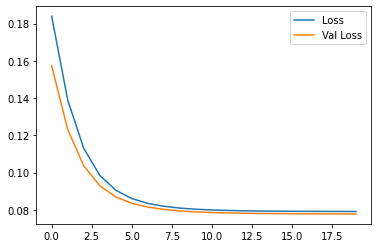

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label = "Val Loss")
plt.legend()

# Get Recipe Recommendation sample

In [21]:
def get_recommendation():
    sample_test = fr['user_id'].sample()
    print('Recipe Recommendation for user: ' + str(sample_test.values[0]) + '\n')
    recipe_viewed = fr[fr['user_id'] == sample_test.values[0]]
    print('Viewed Recipes by User :')
    [print(i) for i in recipe_viewed.merge(df_recipe, left_on='recipe_id', right_on='id',how='inner')['name']]
    
    test_list = [] 
    recipe_not_viewed  = []
    for i,x in enumerate(fr['recipe_id'].unique()):
        if not x in recipe_viewed:
            recipe_not_viewed.append(x)
            test_list.append(sample_test)

    test_list = encoder1.transform(np.array(test_list).reshape(-1,1)).toarray()
    recipe_not_viewed_enc = encoder2.transform(np.array(recipe_not_viewed).reshape(-1,1)).toarray()
    
    pred = model.predict([test_list, recipe_not_viewed_enc])
    return recipe_not_viewed , pred


In [22]:
recipe_not_viewed, pred = get_recommendation()
print('=======' * 10)
print('Recommended recipes for user : ')
pred_df = pd.DataFrame({
    'recipe_id':recipe_not_viewed, 
    'pred':pred.tolist()})
[print(i) for i in pred_df.sort_values('pred', ascending=False).head(5).merge(df_recipe, left_on='recipe_id', right_on='id',how='inner')['name']]
print('=======' * 10)


Recipe Recommendation for user: 1584953

Viewed Recipes by User :
my family s favorite sloppy joes  pizza joes
authentic italian meatballs
yes  virginia there is a great meatloaf
reeses squares   5 ingredients   no bake  reese s
chicken tortilla soup ii
crock pot chicken with black beans   cream cheese
kittencal s 5 minute cinnamon flop brunch cake
Recommended recipes for user : 
mama s supper club tilapia parmesan
5 minute vegan pancakes
denny s style french toast
crumb topped banana muffins
southern buttermilk biscuits
